##### Copyright 2022 The Emirhan BULUT.
# Quantum with 6G Technology in Computer Vision on AI
**Author:** [Emirhan BULUT](https://www.linkedin.com/in/artificialintelligencebulut/)<br>
**Date created:** 2022/10/31<br>
**Last modified:** 2022/10/31<br>
**Description:** Processed with 2nd class land use image datasets accompanied by quantum neural network in a manner compatible with 6G with quantum computer and compared with CNN (at close parameters).

<table class="tfo-notebook-buttons" align="left">

  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1yS5W-EsBDc6RYGYvypveGCv0QaTBCZxo?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/emirhanai"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

It is the algorithmic form of Quantum Neural Network designed according to 6G technology. I have been researching about Quantum Computing + 6G technology for about 2 years. In this software (in a notebook), I processed it with 2nd class land use image datasets accompanied by quantum neural network in a manner compatible with 6G with quantum computer and compared it with CNN (at close parameters). The main purpose of this software is to prove that artificial intelligence has now risen to an advanced (Quantum6) state.

## Download and Unzip Data

In [53]:
!git clone https://github.com/emirhanai/Quantum-with-6G-Technology-in-Computer-Vision-on-AI.git

Cloning into 'Quantum-with-6G-Technology-in-Computer-Vision-on-AI'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [54]:
!unzip "/content/Quantum-with-6G-Technology-in-Computer-Vision-on-AI/datasets_for_quantum6.zip"

Archive:  /content/Quantum-with-6G-Technology-in-Computer-Vision-on-AI/datasets_for_quantum6.zip
   creating: quantum/
   creating: quantum/first class/
  inflating: quantum/first class/first class - Copy (2).png  
  inflating: quantum/first class/first class - Copy (3).png  
  inflating: quantum/first class/first class - Copy (4).png  
  inflating: quantum/first class/first class - Copy (5).png  
  inflating: quantum/first class/first class - Copy (6).png  
  inflating: quantum/first class/first class - Copy (7).png  
  inflating: quantum/first class/first class - Copy (8).png  
  inflating: quantum/first class/first class - Copy (9).png  
  inflating: quantum/first class/first class - Copy.png  
  inflating: quantum/first class/first class.png  
   creating: quantum/second class/
  inflating: quantum/second class/second class - Copy (2).png  
  inflating: quantum/second class/second class - Copy (3).png  
  inflating: quantum/second class/second class - Copy (4).png  
  inflating: qu

## Setup

In [3]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 23 kB/s 
     |████████████████████████████████| 1.3 MB 32.2 MB/s 
     |████████████████████████████████| 463 kB 74.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


Install TensorFlow Quantum Library:

In [4]:
!pip install tensorflow-quantum==0.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.5 MB 23.5 MB/s 
     |████████████████████████████████| 576 kB 67.3 MB/s 
     |████████████████████████████████| 1.6 MB 53.7 MB/s 
     |████████████████████████████████| 90 kB 10.3 MB/s 
     |████████████████████████████████| 100 kB 6.9 MB/s 
     |████████████████████████████████| 6.1 MB 22.9 MB/s 
     |████████████████████████████████| 90 kB 8.9 MB/s 
     |████████████████████████████████| 641 kB 56.1 MB/s 
     |████████████████████████████████| 541 kB 55.6 MB/s 
     |████████████████████████████████| 541 kB 72.2 MB/s 
     |████████████████████████████████| 437 kB 62.1 MB/s 
     |████████████████████████████████| 115 kB 62.3 MB/s 
     |████████████████████████████████| 115 kB 54.3 MB/s 
     |████████████████████████████████| 115 kB 60.4 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |██████████████████████████████

Now import TensorFlow, Keras and the module dependencies:

In [5]:
import tensorflow as tf
import tensorflow_quantum as tfq
import keras
from sklearn.preprocessing import LabelEncoder

import cirq
import sympy
import numpy as np
import seaborn as sns
import collections
import pandas as pd

from sklearn.model_selection import train_test_split
# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

### A. Data Preparation



We will pull the ImageDataGenerator function from the Keras library to convert the images extracted from the zip format into mathematical array to make them ready for processing.

In [55]:
from keras.preprocessing.image import ImageDataGenerator
# We prepare of data
train_datagen = ImageDataGenerator(
    featurewise_center=False, samplewise_center=False, rescale=1.0/255.0, preprocessing_function=None, data_format=None, dtype=None)

train_generator = train_datagen.flow_from_directory("/content/quantum",target_size=(4,4), batch_size=128, class_mode='categorical', interpolation="lanczos", color_mode="grayscale")

Found 20 images belonging to 2 classes.


In [7]:
#from keras_image_generator type to numpy array
x=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
y=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])

In [8]:
#Split of data to x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

Show the first example:

In [9]:
x_train.shape

(16, 4, 4, 1)

[0. 1.]


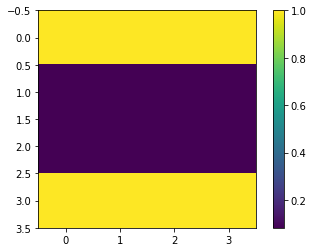

In [10]:
print(y_train[0])

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

### A.B. Resize the images

An image size of 256x256 is much too large for my quantum computer. Resize the image down to 2x2:

In [28]:
first,two = 3,6

In [29]:
#x_train_resize = np.array(tf.image.resize(x_train, (first,two)))
#x_test_resize = np.array(tf.image.resize(x_test, (first,two)))
#print(y_train[0])

#plt.imshow(x_train_resize[0, :, :, 0])
#plt.colorbar()

### A.C. Encode the data as quantum circuits (with qubits)

To process images using a quantum computer.

In [30]:
THRESHOLD = 0.7

x_train_bin = np.array(x_train > THRESHOLD, dtype=np.float32)
x_test_bin = np.array(x_test > THRESHOLD, dtype=np.float32)

In [31]:
x_train_bin.shape

(16, 4, 4, 1)

The qubits at pixel indices with values that exceed a threshold, are rotated through an $X$ gate. And we use (3,6) qubits.

In [32]:
def convert_to_circuit(data):
    """Encode truncated classical data into quantum datapoint."""
    values = np.ndarray.flatten(data)
    qubits = cirq.GridQubit.rect(first,two)
    circuit = cirq.Circuit()
    for i, value in enumerate(values):
        if value:
            circuit.append(cirq.X(qubits[i]))
    return circuit
x_train_circ = [convert_to_circuit(x) for x in x_train_bin]
x_test_circ = [convert_to_circuit(x) for x in x_test_bin]

Here is the circuit created for the first example (circuit diagrams do not show qubits with zero gates):

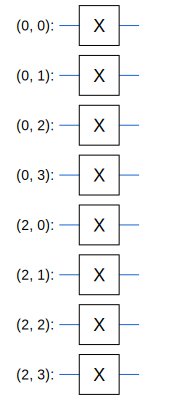

In [33]:
SVGCircuit(x_train_circ[0])

Compare this circuit to the indices where the image value exceeds the threshold:

In [34]:
bin_img = x_train_bin[-1]
indices = np.array(np.where(bin_img)).T
indices

array([[0, 0, 0],
       [0, 1, 0],
       [0, 2, 0],
       [0, 3, 0],
       [3, 0, 0],
       [3, 1, 0],
       [3, 2, 0],
       [3, 3, 0]])

Convert these `Cirq` circuits to tensors for `tfq`:

In [35]:
x_train_tfcirc = tfq.convert_to_tensor(x_train_circ)
x_test_tfcirc = tfq.convert_to_tensor(x_test_circ)

## B. Quantum6 prepared by Python

### B.A. Build the model circuit

In [36]:
class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout
    
    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)

Build an example circuit layer to see how it looks:

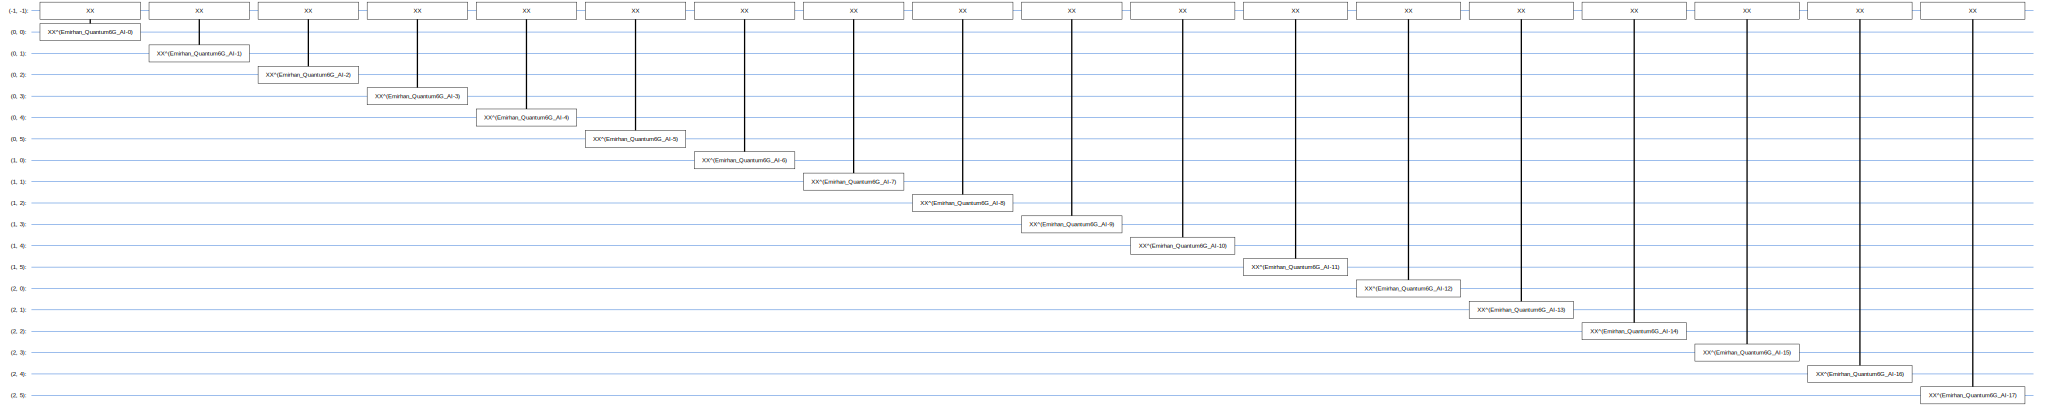

In [37]:
demo_builder = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(first,two),
                                   readout=cirq.GridQubit(-1,-1))

circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate = cirq.XX, prefix='Emirhan_Quantum6G_AI')
SVGCircuit(circuit)

Now build a quantum model, matching the data-circuit size, and include the preparation and readout operations.

In [38]:
def create_quantum_model():
    """Create a Quantum6 AI Brain circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(first,two)   # a 3x6 grid.
    readout = cirq.GridQubit(-1, -1)         # a quantum qubits at [-1,-1]
    circuit = cirq.Circuit()
    
    # Prepare the readout quantum qubits.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))
    
    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    # Then add layers (experiment by adding more).
    builder.add_layer(circuit, cirq.XX, "emir1")
    builder.add_layer(circuit, cirq.ZZ, "bulut1")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [39]:
model_circuit, model_readout = create_quantum_model()

### B.C. Build a Sequential Model for Quantum

In [40]:
# Build the Tensorflow/Keras Sequential model.
model = keras.Sequential([
    # The input is the data-circuit (data format), encoded as a tf.string (type)
    keras.layers.Input(shape=(), dtype=tf.string),
    tfq.layers.PQC(model_circuit, model_readout),
])

Model Compile

In [41]:
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

In [42]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pqc_1 (PQC)                 (None, 1)                 36        
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
None


### Quantum6 model with training in Keras

In [43]:
EPOCHS = 35
BATCH_SIZE = 128

NUM_EXAMPLES = len(x_train_tfcirc)

Model fitting

In [44]:
quantum6_history = model.fit(x_train_tfcirc, y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=0,validation_data=(x_test_tfcirc, y_test))

quantum_6_results = model.evaluate(x_test_tfcirc, y_test)

1/1 [==============================] - 0s 185ms/step - loss: 0.4939 - accuracy: 0.5000


In [45]:
def cnn_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(2,2,input_shape=(4,4,1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(2))
    return model


model = cnn_model()
model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 3, 2)           10        
                                                                 
 flatten (Flatten)           (None, 18)                0         
                                                                 
 dense (Dense)               (None, 2)                 38        
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [46]:
cnn_model = model.fit(x_train_bin,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=0,validation_data=(x_test_bin, y_test))

cnn_model_results = model.evaluate(x_test_bin, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.9469 - accuracy: 0.2500


## C. Results on Matplotlib

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


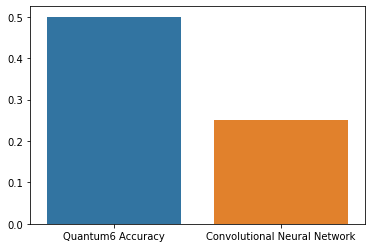

In [52]:
sns.barplot(["Quantum6 Accuracy","Convolutional Neural Network"],
            [quantum_6_results[1],cnn_model_results[1]])